<a href="https://colab.research.google.com/github/Gabrielsandbox/Python-Codebase/blob/main/LimpezaeTratamentodedados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as srn

In [ ]:
dataset = pd.read_csv('/content/Churn.csv', sep = ";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.columns = ['id', 'Score', 'Estado', 'Gênero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito',
                   'Ativo', 'Salario', 'Saiu']
dataset.head()

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.isnull().sum()

id                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

<Axes: xlabel='Gênero'>

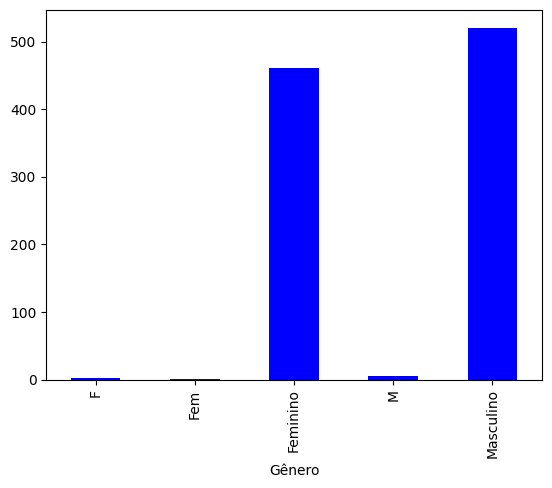

In [ ]:
categoric_analysis = dataset.groupby(['Gênero']).size()
categoric_analysis.plot.bar(color = 'blue')

In [ ]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salário')

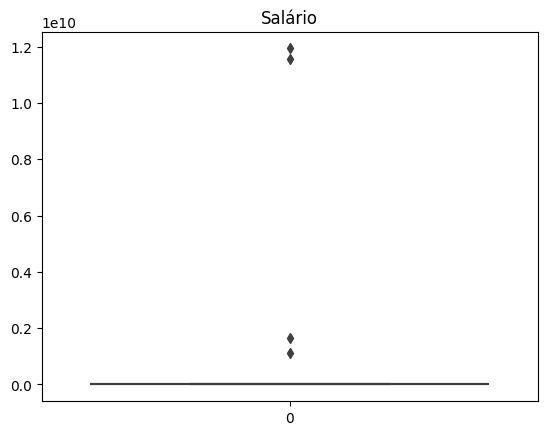

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salário')

In [ ]:
#Primeiro tratamento de dados
dataset['Salario'].isnull().sum()
mediana = sts.median(dataset['Salario'])
mediana
dataset['Salario'].fillna(mediana, inplace=True)
dataset['Salario'].isnull().sum()

0

In [ ]:
dataset['Gênero'].isnull().sum()
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
dataset['Gênero'].fillna('Masculino', inplace=True) #NaN para 'Masculino' porque é a moda.

In [ ]:
dataset['Gênero'].isnull().sum()

0

In [ ]:
#Padronização do domínio 'Gênero'
dataset.loc[dataset['Gênero'] == "M", 'Gênero'] = 'Masculino'
dataset.loc[dataset['Gênero'].isin(['F', 'Fem']), 'Gênero'] = 'Feminino'

In [ ]:
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
dataset.loc[ (dataset['Idade'] < 0) | (dataset['Idade'] > 120) ]

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
mediana = sts.median(dataset['Idade'])

In [ ]:
dataset.loc[ (dataset['Idade'] < 0) | (dataset['Idade'] > 120) ] = mediana

In [ ]:
dataset[dataset.duplicated(['id'],keep=False)]

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [ ]:
dataset.drop_duplicates(subset='id', keep='first', inplace=True)

In [ ]:
dataset[dataset.duplicated(['id'],keep=False)]

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
group = dataset.groupby(['Estado']).size()
group

In [ ]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
group = dataset.groupby(['Estado']).size()
group

In [ ]:
desv = sts.stdev(dataset['Salario'])
desv

529784177.60963464

In [ ]:
dataset.loc[dataset['Salario'] > 2 * desv]

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
mediana = sts.median(dataset['Salario'])

In [ ]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [ ]:
mediana = sts.median(dataset['Salario'])

In [ ]:
dataset.head

<bound method NDFrame.head of        id  Score Estado     Gênero  Idade  Patrimonio     Saldo  Produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000    811     PR   Feminino     28           4  16773882         2   

     TemCartCredito  Ativo     Salario  Saiu 

In [ ]:
dataset.shape

In [ ]:
tempdata = pd.read_csv('/content/tempo.csv', sep = ';')

In [ ]:
tempdata.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
tempdata.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [ ]:
tempdata.loc[(tempdata['Umidade'] > 100) | (tempdata['Umidade'] < 0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
tempdata['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
mediana_umidade = sts.median(tempdata['Umidade'])
mediana_umidade

tempdata.loc[(tempdata['Umidade'] > 100) | (tempdata['Umidade'] < 0), 'Umidade'] = mediana_umidade

tempdata['Umidade'].fillna(mediana_umidade, inplace=True)

In [ ]:
group_vento = tempdata.groupby(['Vento']).size()
group_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
tempdata['Vento'].fillna('FALSO', inplace=True)

In [ ]:
tempdata.shape

(14, 5)